## 03_analysis_m
  
**An in depth dive into the data in order to understand it**  

* Categorical variables distribution investigation
* Crash Injury Patterns Visualizations
    * Time of Day
    * Day of Week
    * Geographically

In [ ]:
!pip install klib

In [ ]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=7fc4615313c28b79a17a26c0d078ff85df56fac53c0850cec1ff11dce2b62336
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 39.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import klib
import sweetviz
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from platform import python_version

%precision 2

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.width = 120
pd.options.display.float_format='{:,.2f}'.format
pd.options.display.precision = 2

np.set_printoptions(precision=4, linewidth=120, suppress=True, edgeitems=5)

sns.set_style("white")

print('python',python_version())
print(np.__name__, np.__version__)
print(pd.__name__, pd.__version__)
print(klib.__name__, klib.__version__)
print(sklearn.__name__, sklearn.__version__)
print(sweetviz.__name__, sweetviz.__version__)

python 3.10.12
numpy 1.25.2
pandas 2.0.3
klib 1.1.2
sklearn 1.2.2
sweetviz 2.3.1


# Read Data

In [ ]:
file_crash_df = '/content/sample_data/crash_df.csv'

crash_df = pd.read_csv(file_crash_df)

crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814109 entries, 0 to 814108
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               814109 non-null  int64  
 1   crash_date               814109 non-null  object 
 2   crash_year               814109 non-null  int64  
 3   crash_month              814109 non-null  int64  
 4   crash_day_of_week        814109 non-null  int64  
 5   crash_hour               814109 non-null  int64  
 6   crash_time_of_day        814109 non-null  object 
 7   latitude                 814109 non-null  float64
 8   longitude                814109 non-null  float64
 9   beat_of_occurrence       814109 non-null  int64  
 10  address                  814109 non-null  object 
 11  street_no                814109 non-null  int64  
 12  street_direction         814108 non-null  object 
 13  street_name              814109 non-null  object 
 14  post

In [ ]:
[*crash_df.columns]

['Unnamed: 0',
 'crash_date',
 'crash_year',
 'crash_month',
 'crash_day_of_week',
 'crash_hour',
 'crash_time_of_day',
 'latitude',
 'longitude',
 'beat_of_occurrence',
 'address',
 'street_no',
 'street_direction',
 'street_name',
 'posted_speed_limit',
 'traffic_control_device',
 'device_condition',
 'weather_condition',
 'lighting_condition',
 'trafficway_type',
 'alignment',
 'roadway_surface_cond',
 'road_defect',
 'first_crash_type',
 'prim_contributory_cause',
 'sec_contributory_cause',
 'num_units',
 'has_injuries',
 'has_fatal',
 'crash_type',
 'damage',
 'injuries_total',
 'injuries_fatal']

In [ ]:
features_names = [
    'crash_date',
    'crash_year',
    'crash_month',
    'crash_day_of_week',
    'crash_hour',
    'crash_time_of_day',
    'latitude',
    'longitude',
    'beat_of_occurrence',
    'address',
    'posted_speed_limit',
    'traffic_control_device',
    'device_condition',
    'weather_condition',
    'lighting_condition',
    'trafficway_type',
    'alignment',
    'roadway_surface_cond',
    'road_defect',
    'first_crash_type',
    'prim_contributory_cause',
    'sec_contributory_cause',
    'num_units'
]

target_names = [
    'has_injuries', 
    'has_fatal', 
    'crash_type',
    'damage',
    'injuries_total',
    'injuries_fatal'
]

all_columns = features_names + target_names
all_columns

['crash_date',
 'crash_year',
 'crash_month',
 'crash_day_of_week',
 'crash_hour',
 'crash_time_of_day',
 'latitude',
 'longitude',
 'beat_of_occurrence',
 'address',
 'posted_speed_limit',
 'traffic_control_device',
 'device_condition',
 'weather_condition',
 'lighting_condition',
 'trafficway_type',
 'alignment',
 'roadway_surface_cond',
 'road_defect',
 'first_crash_type',
 'prim_contributory_cause',
 'sec_contributory_cause',
 'num_units',
 'has_injuries',
 'has_fatal',
 'crash_type',
 'damage',
 'injuries_total',
 'injuries_fatal']

In [ ]:
crash_df.posted_speed_limit.value_counts()

posted_speed_limit
30     601084
35      54363
25      51332
20      33337
15      28598
10      18971
40       7846
0        7469
45       5250
5        4857
55        649
50        224
100        66
60         43
65         15
70          5
Name: count, dtype: int64

In [ ]:
import numpy as np

crash_df['rounded_speed_limit'] = np.floor(crash_df.posted_speed_limit / 10) * 10
result = crash_df['rounded_speed_limit'].value_counts()

result


posted_speed_limit
30     601084
20     113267
40      67459
10      18971
0       12326
60        707
50        224
100        66
70          5
Name: count, dtype: int64

In [ ]:
crash_df['rounded_speed_limit'] = (crash_df.posted_speed_limit / 10).round() * 10
result = crash_df['rounded_speed_limit'].value_counts()

result

posted_speed_limit
30     655447
20      84669
10      47569
40      13096
0       12326
50        873
100        66
60         58
70          5
Name: count, dtype: int64

In [ ]:
crash_df['rounded_speed_limit'] = (crash_df.posted_speed_limit / 5).round() * 5
result = crash_df['rounded_speed_limit'].value_counts()

result

posted_speed_limit
30     601084
35      54363
25      51332
20      33337
15      28598
10      18971
40       7846
0        7469
45       5250
5        4857
55        649
50        224
100        66
60         43
65         15
70          5
Name: count, dtype: int64

In [ ]:
crash_df.beat_of_occurrence.nunique()

271

In [ ]:
crash_df.groupby(['latitude','longitude']).size().reset_index(name='n')

latitude  longitude   n
0          41.64     -87.54  23
1          41.64     -87.62   4
2          41.64     -87.62   7
3          41.64     -87.62   1
4          41.64     -87.62   5
...          ...        ...  ..
300528     42.02     -87.67   1
300529     42.02     -87.67   2
300530     42.02     -87.67   1
300531     42.02     -87.67   1
300532     42.02     -87.67   9

[300533 rows x 3 columns]

In [ ]:
crash_df.crash_type.value_counts()

crash_type
NO INJURY / DRIVE AWAY              597036
INJURY AND / OR TOW DUE TO CRASH    217073
Name: count, dtype: int64

In [ ]:
crash_df.injuries_total.apply(lambda x: int(x>0)).value_counts()

injuries_total
0    701859
1    112250
Name: count, dtype: int64

In [ ]:
crash_df.injuries_fatal.apply(lambda x: int(x>0)).value_counts()

injuries_fatal
0    813213
1       896
Name: count, dtype: int64

In [ ]:
crash_df.first_crash_type.value_counts()

first_crash_type
PARKED MOTOR VEHICLE            189632
REAR END                        181963
SIDESWIPE SAME DIRECTION        123621
TURNING                         116630
ANGLE                            88881
FIXED OBJECT                     37730
PEDESTRIAN                       19027
PEDALCYCLIST                     12313
SIDESWIPE OPPOSITE DIRECTION     11507
OTHER OBJECT                      7984
REAR TO FRONT                     7861
HEAD ON                           6962
REAR TO SIDE                      4705
OTHER NONCOLLISION                2541
REAR TO REAR                      1640
ANIMAL                             586
OVERTURNED                         481
TRAIN                               45
Name: count, dtype: int64

In [ ]:
crash_df.trafficway_type.value_counts()

trafficway_type
NOT DIVIDED                        354812
DIVIDED - W/MEDIAN (NOT RAISED)    130546
ONE-WAY                            102979
PARKING LOT                         55157
FOUR WAY                            51752
DIVIDED - W/MEDIAN BARRIER          46167
OTHER                               21810
ALLEY                               13531
T-INTERSECTION                      10357
UNKNOWN                              9472
CENTER TURN LANE                     5897
DRIVEWAY                             2635
RAMP                                 2428
UNKNOWN INTERSECTION TYPE            2391
Y-INTERSECTION                       1128
FIVE POINT, OR MORE                  1118
TRAFFIC ROUTE                         927
NOT REPORTED                          579
ROUNDABOUT                            260
L-INTERSECTION                        163
Name: count, dtype: int64

In [ ]:
crash_df.prim_contributory_cause.value_counts()

prim_contributory_cause
UNABLE TO DETERMINE                                                                 317047
FAILING TO YIELD RIGHT-OF-WAY                                                        89504
FOLLOWING TOO CLOSELY                                                                79077
NOT APPLICABLE                                                                       43033
IMPROPER OVERTAKING/PASSING                                                          40145
FAILING TO REDUCE SPEED TO AVOID CRASH                                               34447
IMPROPER BACKING                                                                     32007
IMPROPER LANE USAGE                                                                  29002
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  27243
IMPROPER TURNING/NO SIGNAL                                                           27082
DISREGARDING TRAFFIC SIGNALS                                      

In [ ]:
crash_df.sec_contributory_cause.value_counts()

sec_contributory_cause
NOT APPLICABLE                                                                      334397
UNABLE TO DETERMINE                                                                 294500
FAILING TO REDUCE SPEED TO AVOID CRASH                                               30419
FAILING TO YIELD RIGHT-OF-WAY                                                        25622
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  24769
FOLLOWING TOO CLOSELY                                                                21458
IMPROPER OVERTAKING/PASSING                                                          12484
IMPROPER LANE USAGE                                                                  11412
WEATHER                                                                               9385
IMPROPER TURNING/NO SIGNAL                                                            8332
IMPROPER BACKING                                                   

In [ ]:
crash_df.traffic_control_device.value_counts()

traffic_control_device
NO CONTROLS                 462328
TRAFFIC SIGNAL              225940
STOP SIGN/FLASHER            81092
UNKNOWN                      32810
OTHER                         5370
YIELD                         1192
LANE USE MARKING              1171
OTHER REG. SIGN                887
OTHER WARNING SIGN             644
RAILROAD CROSSING GATE         529
PEDESTRIAN CROSSING SIGN       517
DELINEATORS                    318
FLASHING CONTROL SIGNAL        317
SCHOOL ZONE                    310
POLICE/FLAGMAN                 268
OTHER RAILROAD CROSSING        181
RR CROSSING SIGN               159
NO PASSING                      51
BICYCLE CROSSING SIGN           25
Name: count, dtype: int64

In [ ]:
crash_df.injuries_total.describe()

count   814,109.00
mean          0.19
std           0.57
min           0.00
25%           0.00
50%           0.00
75%           0.00
max          21.00
Name: injuries_total, dtype: float64

# Define Weekdays

In [ ]:
week_days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
is_weekday = {0:'Weekend',1:'Weekday'}

# Crash Hour Analysis

array([[<Axes: title={'center': '2013'}>, <Axes: title={'center': '2014'}>],
       [<Axes: title={'center': '2015'}>, <Axes: title={'center': '2016'}>],
       [<Axes: title={'center': '2017'}>, <Axes: title={'center': '2018'}>],
       [<Axes: title={'center': '2019'}>, <Axes: title={'center': '2020'}>],
       [<Axes: title={'center': '2021'}>, <Axes: title={'center': '2022'}>],
       [<Axes: title={'center': '2023'}>, <Axes: title={'center': '2024'}>]], dtype=object)

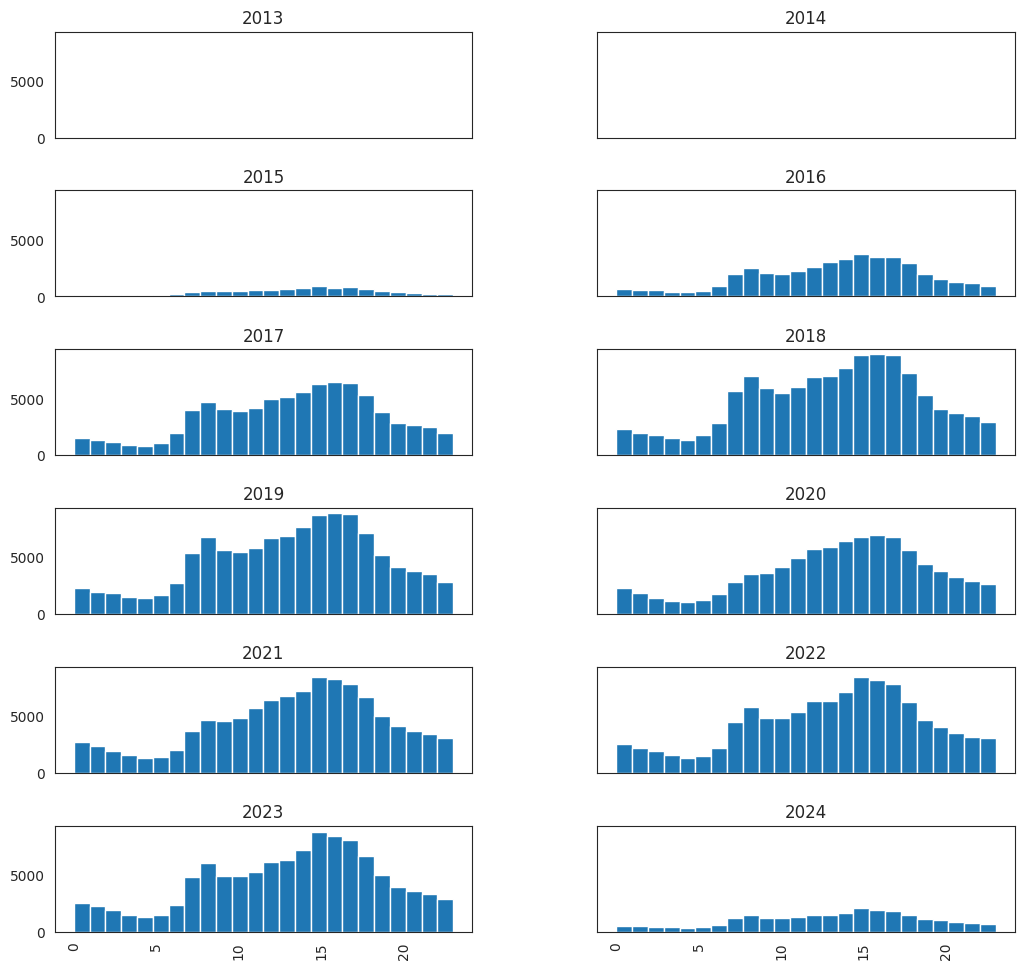

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Plotting the histogram
crash_df.hist('crash_hour', bins=24, by='crash_year', layout=(6, 2), figsize=(12, 12), sharey=True, sharex=True)

# Display the plot
plt.show()


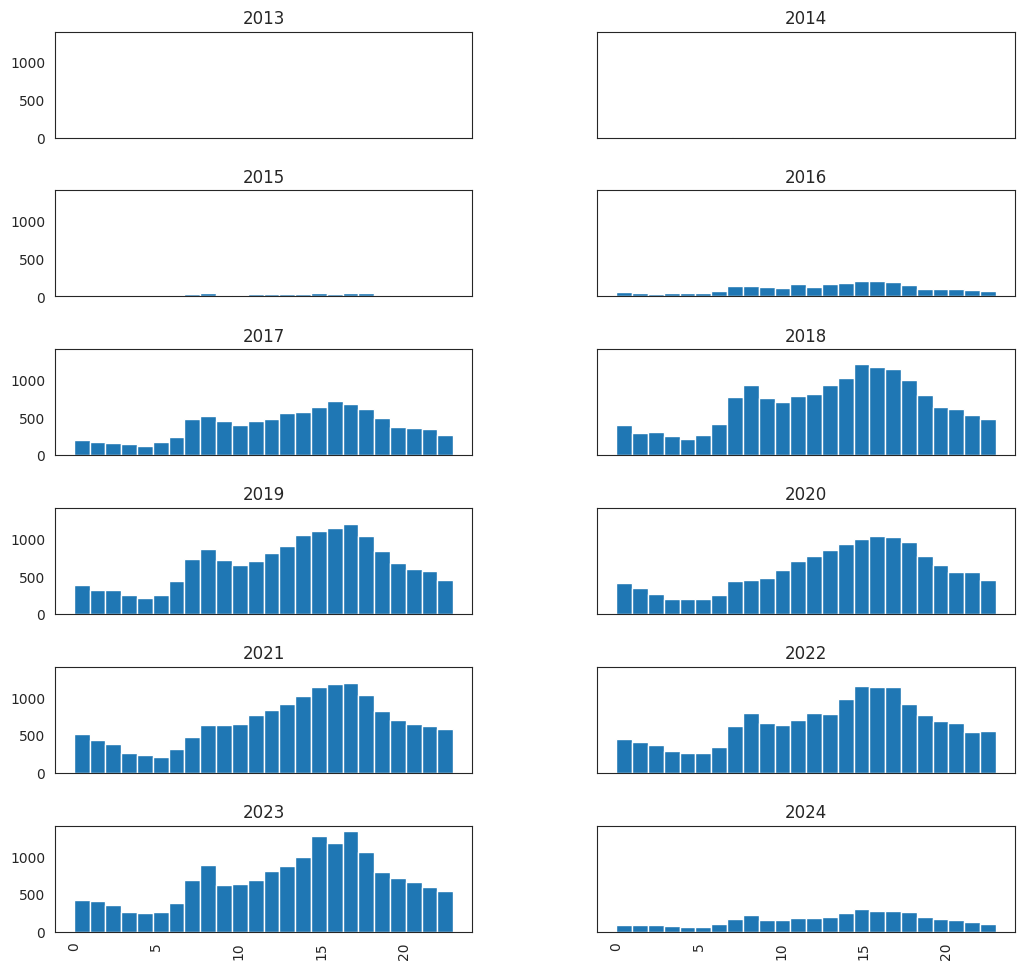

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Applying the query to filter rows and plotting the histogram
crash_df.query('has_injuries == 1').hist('crash_hour', bins=24, by='crash_year', layout=(6, 2), figsize=(12, 12), sharey=True, sharex=True)

# Showing the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'crash_df' is your DataFrame and 'crash_hour' is a column in it

# Creating a Series for categorized 'crash_hour' data
time_of_day = pd.cut(crash_df.crash_hour, bins=[-np.inf, 6, 12, 18, np.inf], labels=['overnight', 'morning', 'mid_day', 'evening'])




In [ ]:
time_of_day

0           mid_day
1           mid_day
2           mid_day
3         overnight
4           morning
            ...    
814104    overnight
814105      mid_day
814106      mid_day
814107    overnight
814108      morning
Name: crash_hour, Length: 814109, dtype: category
Categories (4, object): ['overnight' < 'morning' < 'mid_day' < 'evening']

In [ ]:
time_of_day.value_counts()

crash_hour
mid_day      339924
morning      241005
evening      138796
overnight     94384
Name: count, dtype: int64

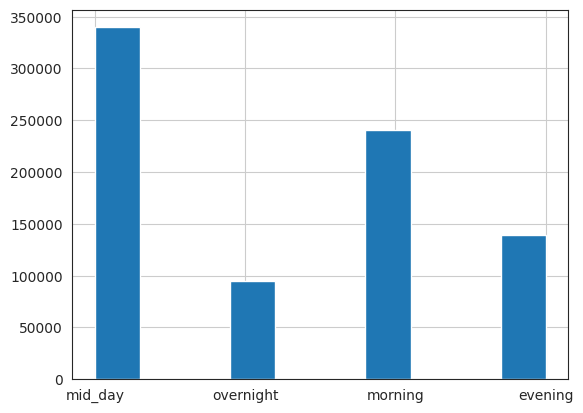

In [ ]:
time_of_day.hist();

In [ ]:
crash_df.crash_hour.isna().sum()

0

In [ ]:
time_of_day.isna().sum()

0

In [ ]:
crash_df.crash_hour.describe()

count   814,109.00
mean         13.20
std           5.56
min           0.00
25%           9.00
50%          14.00
75%          17.00
max          23.00
Name: crash_hour, dtype: float64

# Analaysis

Let's try out some aggreggations

In [ ]:
crash_agg = crash_df.groupby([
    'crash_year',
    'crash_month',
    'crash_hour'
]).agg({
    'injuries_total':np.sum,
    'injuries_fatal':np.sum
}
).fillna(0).reset_index()
crash_agg

crash_year  crash_month  crash_hour  injuries_total  injuries_fatal
0           2013            3          16               2               0
1           2013            6          20               1               0
2           2014            1           7               1               0
3           2014            1          18               0               0
4           2014            2          19               0               0
...          ...          ...         ...             ...             ...
2546        2024            4          19              17               0
2547        2024            4          20               5               0
2548        2024            4          21               5               0
2549        2024            4          22               9               0
2550        2024            4          23               0               0

[2551 rows x 5 columns]

In [ ]:
crash_agg.pivot_table(index=['crash_month'],columns='crash_year',values=['injuries_total','injuries_fatal'],aggfunc='sum')

injuries_fatal                                                                injuries_total              \
crash_year            2013 2014 2015 2016  2017  2018  2019  2020  2021  2022  2023  2024           2013 2014   2015   
crash_month                                                                                                            
1                      NaN 0.00 0.00 1.00  3.00 11.00 11.00  7.00  9.00 12.00 15.00  4.00            NaN 1.00   0.00   
2                      NaN 0.00 0.00 0.00  5.00  6.00  4.00 10.00  3.00 14.00 15.00  7.00            NaN 0.00   0.00   
3                     0.00  NaN  NaN 1.00  5.00 11.00  9.00  3.00 10.00 11.00 15.00 15.00           2.00  NaN    NaN   
4                      NaN  NaN 0.00 0.00  2.00 11.00  6.00 11.00  6.00 11.00  8.00  1.00            NaN  NaN   0.00   
5                      NaN  NaN 0.00 3.00  6.00  7.00  9.00 12.00 18.00  9.00 11.00   NaN            NaN  NaN   0.00   
6                     0.00 0.00 0.00 0.00  9.00 11.00 11.00 15.00 15.00  8.00 13.00   NaN           1.00 0.00   0.00   
7                      NaN  NaN 0.00 2.00  7.00 21.00  8.00 22.00 14.00 18.00  9.00   NaN            NaN  NaN   0.00   
8                      NaN 0.00 0.00 2.00 11.00 13.00 14.00 11.00 21.00 12.00 10.00   NaN            NaN 0.00  32.00   
9                      NaN  NaN 0.00 0.00 13.00  9.00 11.00 16.00 19.00 15.00 13.00   NaN            NaN  NaN  87.00   
10                     NaN  NaN 1.00 3.00  4.00 13.00  8.00 17.00 13.00 11.00 16.00   NaN            NaN  NaN 179.00   
11                     NaN 0.00 1.00 1.00 13.00  5.00 10.00  6.00 19.00 10.00 10.00   NaN            NaN 0.00 199.00   
12                     NaN  NaN 1.00 1.00  9.00  9.00  5.00 15.00 17.00 18.00 12.00   NaN            NaN  NaN 216.00   

                                                                                            
crash_year    2016     2017     2018     2019     2020     2021     2022     2023     2024  
crash_month                                                                                 
1           202.00   318.00 1,777.00 1,500.00 1,632.00 1,352.00 1,419.00 1,484.00 1,547.00  
2           166.00   342.00 1,287.00 1,404.00 1,650.00 1,112.00 1,371.00 1,456.00 1,662.00  
3           263.00   372.00 1,639.00 1,706.00 1,413.00 1,454.00 1,600.00 1,704.00 1,924.00  
4           240.00   511.00 1,776.00 1,756.00   893.00 1,798.00 1,694.00 1,839.00   239.00  
5           262.00   679.00 2,144.00 2,126.00 1,411.00 2,097.00 2,013.00 2,091.00      NaN  
6           203.00   790.00 2,003.00 2,107.00 1,831.00 2,362.00 2,218.00 2,064.00      NaN  
7           263.00 1,034.00 2,155.00 2,120.00 2,128.00 2,336.00 2,191.00 2,156.00      NaN  
8           369.00 1,438.00 2,034.00 2,116.00 2,106.00 2,067.00 1,912.00 2,123.00      NaN  
9           435.00 1,904.00 1,948.00 1,948.00 1,873.00 2,120.00 2,017.00 2,136.00      NaN  
10          482.00 2,056.00 2,028.00 2,057.00 1,841.00 2,108.00 2,038.00 2,336.00      NaN  
11          398.00 1,802.00 1,732.00 1,830.00 1,475.00 1,735.00 1,762.00 1,935.00      NaN  
12          325.00 1,820.00 1,905.00 1,613.00 1,375.00 1,680.00 1,711.00 1,946.00      NaN

In [ ]:
crash_agg.fillna(0)

crash_year  crash_month  crash_hour  injuries_total  injuries_fatal
0           2013            3          16               2               0
1           2013            6          20               1               0
2           2014            1           7               1               0
3           2014            1          18               0               0
4           2014            2          19               0               0
...          ...          ...         ...             ...             ...
2546        2024            4          19              17               0
2547        2024            4          20               5               0
2548        2024            4          21               5               0
2549        2024            4          22               9               0
2550        2024            4          23               0               0

[2551 rows x 5 columns]

In [ ]:
crash_agg.pivot_table(index=['crash_month'],columns='crash_year',values=['injuries_total','injuries_fatal'],aggfunc='sum',fill_value=0)

injuries_fatal                                                        injuries_total                       \
crash_year            2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024           2013 2014 2015 2016  2017   
crash_month                                                                                                             
1                        0    0    0    1    3   11   11    7    9   12   15    4              0    1    0  202   318   
2                        0    0    0    0    5    6    4   10    3   14   15    7              0    0    0  166   342   
3                        0    0    0    1    5   11    9    3   10   11   15   15              2    0    0  263   372   
4                        0    0    0    0    2   11    6   11    6   11    8    1              0    0    0  240   511   
5                        0    0    0    3    6    7    9   12   18    9   11    0              0    0    0  262   679   
6                        0    0    0    0    9   11   11   15   15    8   13    0              1    0    0  203   790   
7                        0    0    0    2    7   21    8   22   14   18    9    0              0    0    0  263  1034   
8                        0    0    0    2   11   13   14   11   21   12   10    0              0    0   32  369  1438   
9                        0    0    0    0   13    9   11   16   19   15   13    0              0    0   87  435  1904   
10                       0    0    1    3    4   13    8   17   13   11   16    0              0    0  179  482  2056   
11                       0    0    1    1   13    5   10    6   19   10   10    0              0    0  199  398  1802   
12                       0    0    1    1    9    9    5   15   17   18   12    0              0    0  216  325  1820   

                                                       
crash_year   2018  2019  2020  2021  2022  2023  2024  
crash_month                                            
1            1777  1500  1632  1352  1419  1484  1547  
2            1287  1404  1650  1112  1371  1456  1662  
3            1639  1706  1413  1454  1600  1704  1924  
4            1776  1756   893  1798  1694  1839   239  
5            2144  2126  1411  2097  2013  2091     0  
6            2003  2107  1831  2362  2218  2064     0  
7            2155  2120  2128  2336  2191  2156     0  
8            2034  2116  2106  2067  1912  2123     0  
9            1948  1948  1873  2120  2017  2136     0  
10           2028  2057  1841  2108  2038  2336     0  
11           1732  1830  1475  1735  1762  1935     0  
12           1905  1613  1375  1680  1711  1946     0

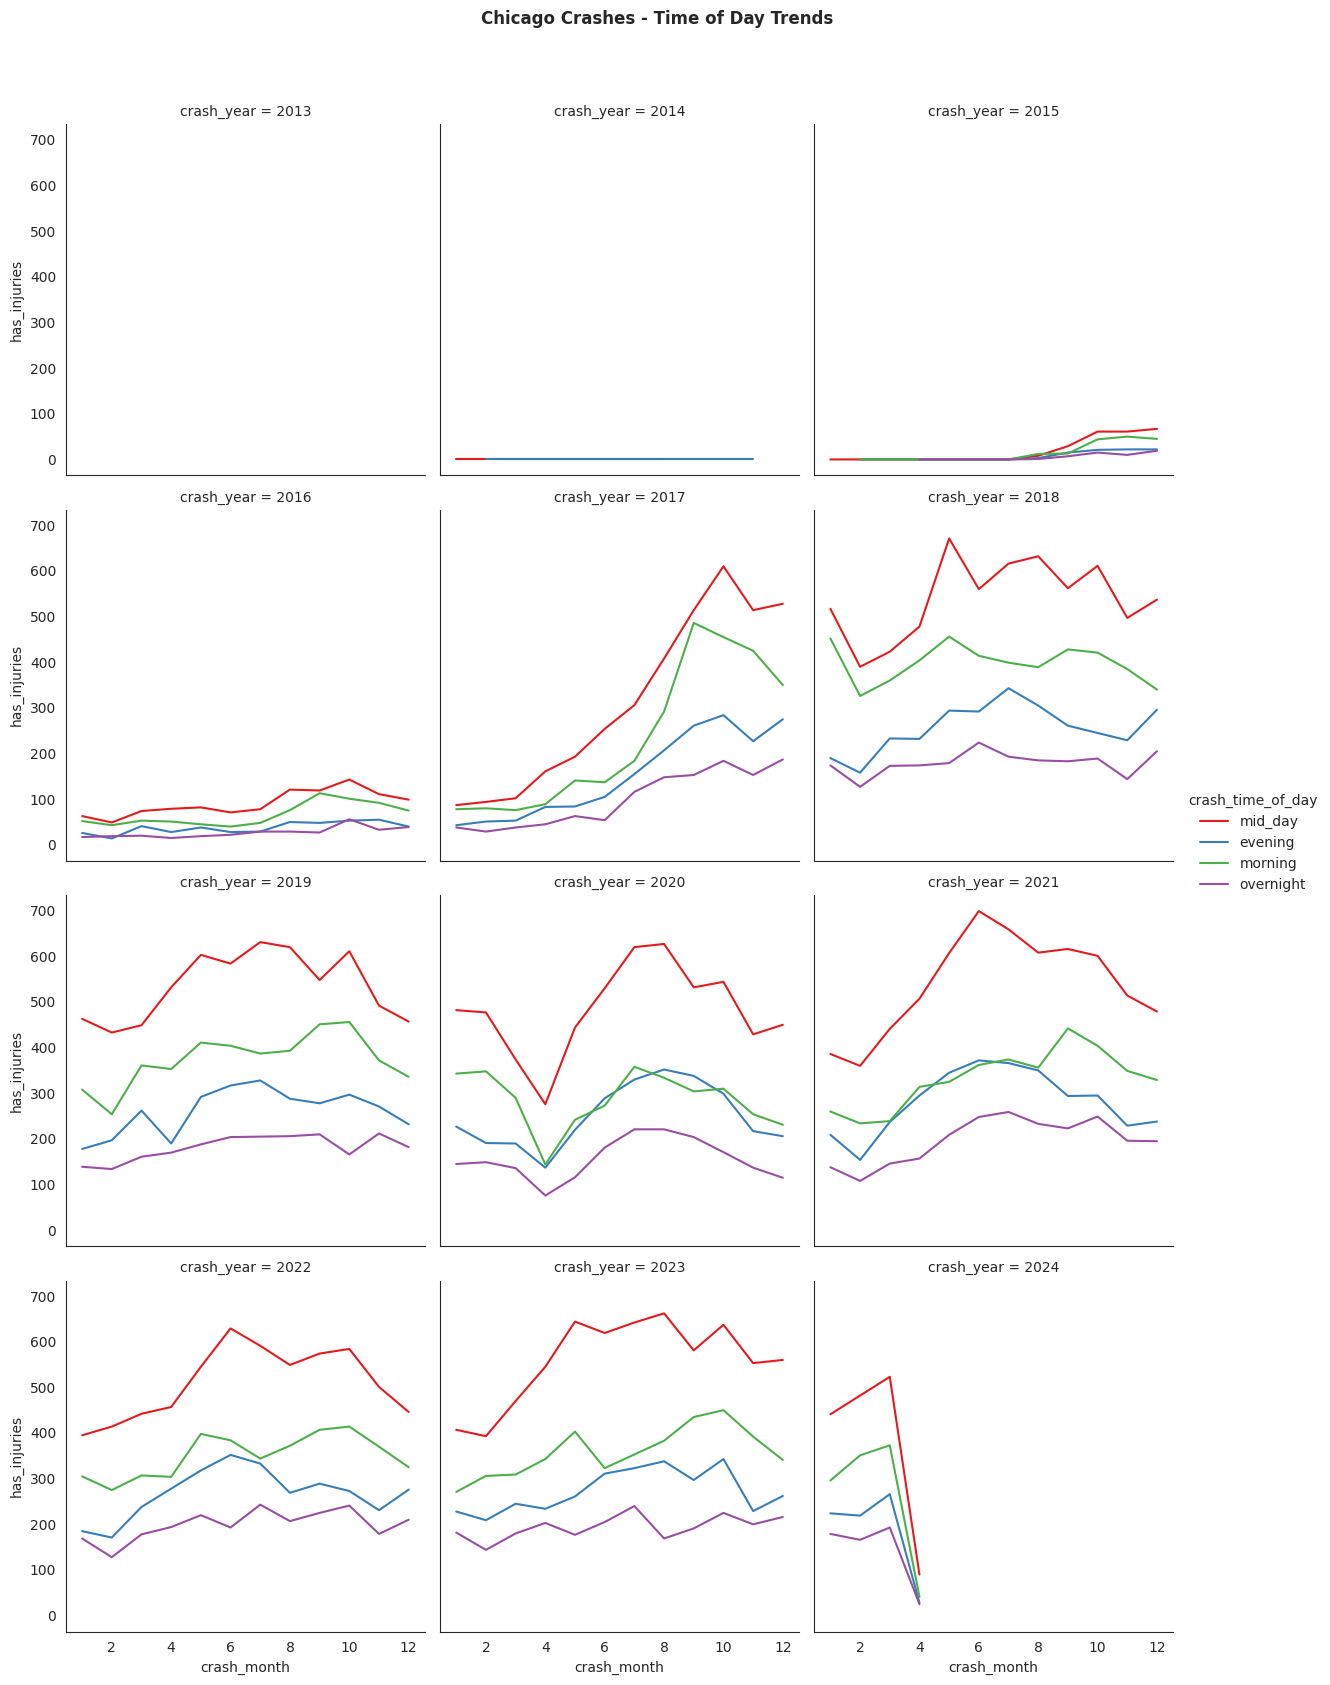

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Aggregating crash data
crash_summary = crash_df.groupby([
    'crash_year',
    'crash_month',
    'crash_time_of_day',
]).agg({
    'has_injuries': np.sum,
    'has_fatal': np.sum,
    'total_injuries': np.sum,
    'fatal_injuries': np.sum
}).fillna(0).reset_index()

# Setting up a FacetGrid for visualization
crash_grid = sns.FacetGrid(crash_summary, col='crash_year', hue='crash_time_of_day', palette='Set1', col_wrap=3, height=4)
crash_grid.map_dataframe(sns.lineplot, 'crash_month', 'has_injuries')
crash_grid.fig.suptitle('Chicago Crashes - Time of Day Trends', y=1.05, fontweight='bold')
crash_grid.add_legend()
plt.show()


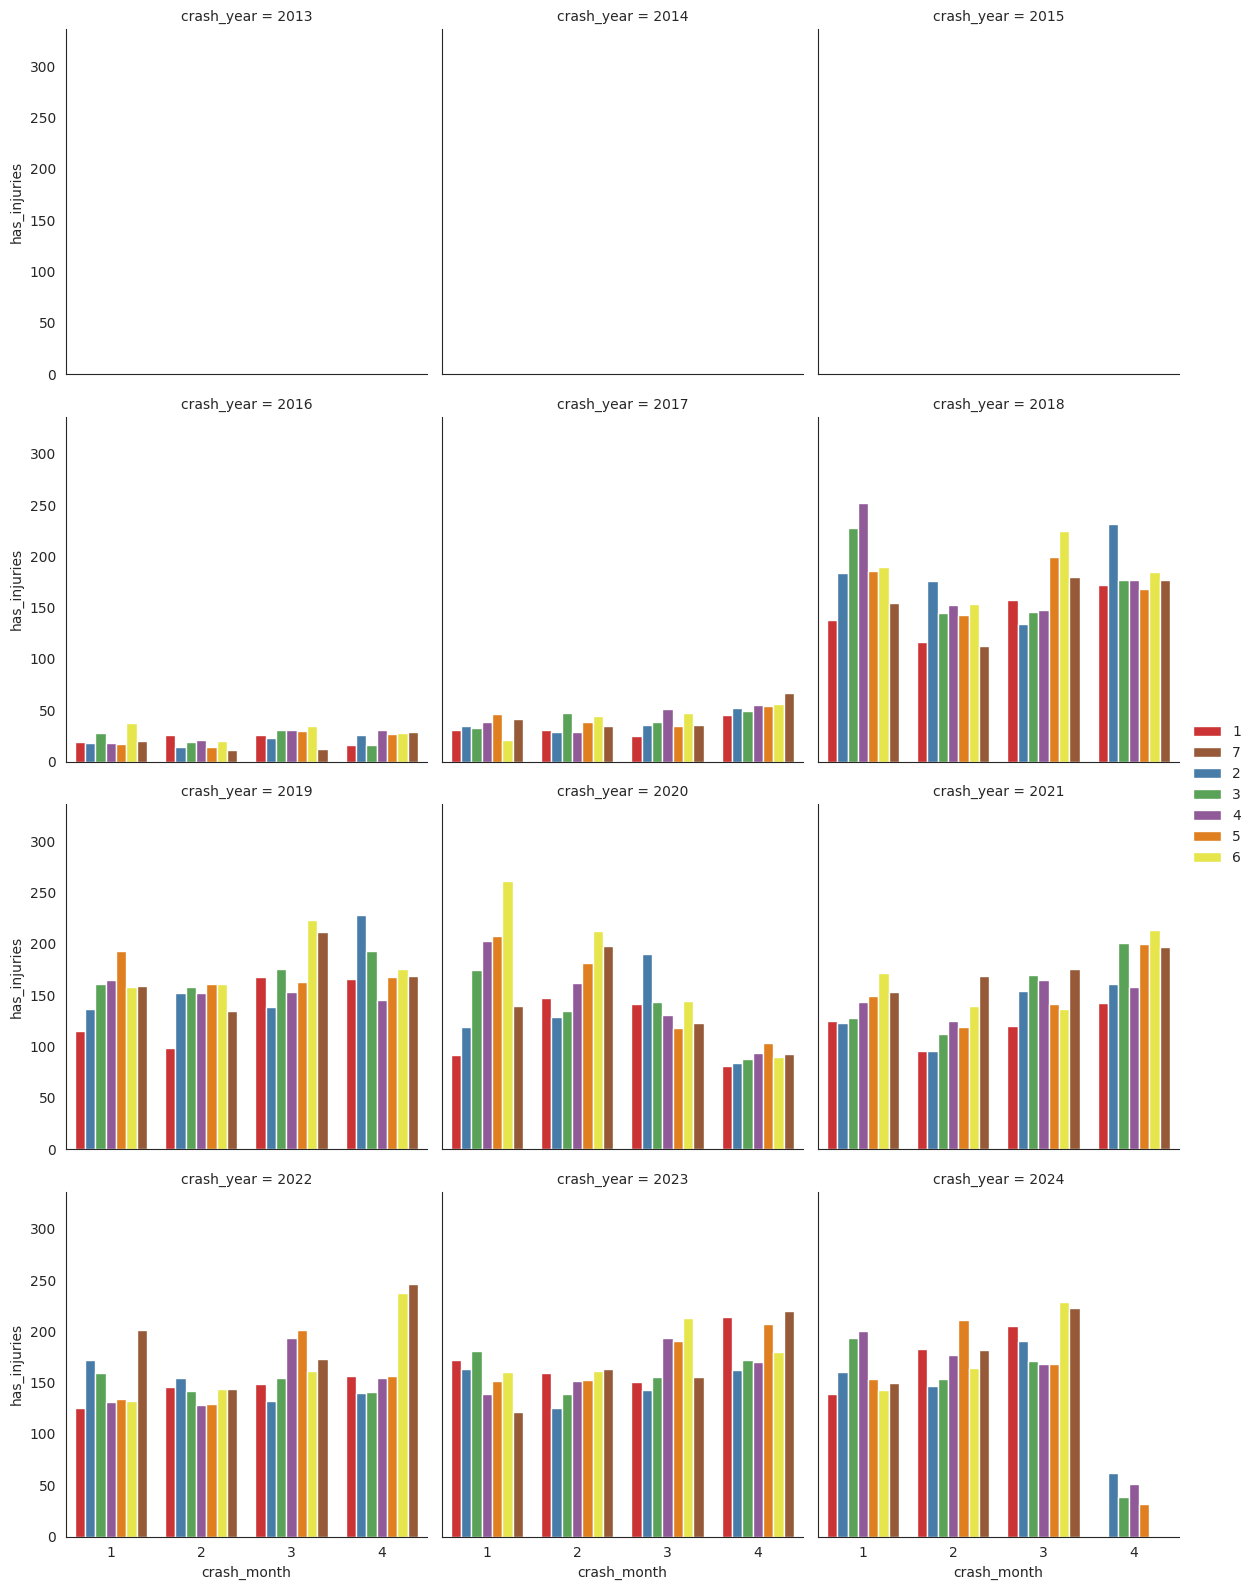

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate crash data by year, month, and day of the week
aggregated_data = crash_df.groupby([
    'crash_year',
    'crash_month',
    'crash_day_of_week',
]).agg({
    'total_injuries': np.sum,  # Sum of injuries
    'fatal_injuries': np.sum   # Sum of fatal injuries
}).fillna(0).reset_index()     # Fill missing values with 0

# Initialize a FacetGrid for visualizing the aggregated data
crash_visual_grid = sns.FacetGrid(aggregated_data, col='crash_year', col_wrap=3, height=4, aspect=1.2)
# Map a barplot onto the grid
crash_visual_grid.map_dataframe(sns.barplot, 'crash_month', 'total_injuries', hue='crash_day_of_week', palette='Set1')
# Add a legend to the grid
crash_visual_grid.add_legend()
# Adjust the title and layout
crash_visual_grid.fig.suptitle('Monthly Crash Injuries by Day of Week', y=1.02, fontweight='bold')
plt.show()


In [ ]:
(crash_df.weather_condition == 'OTHER').sum()

2582

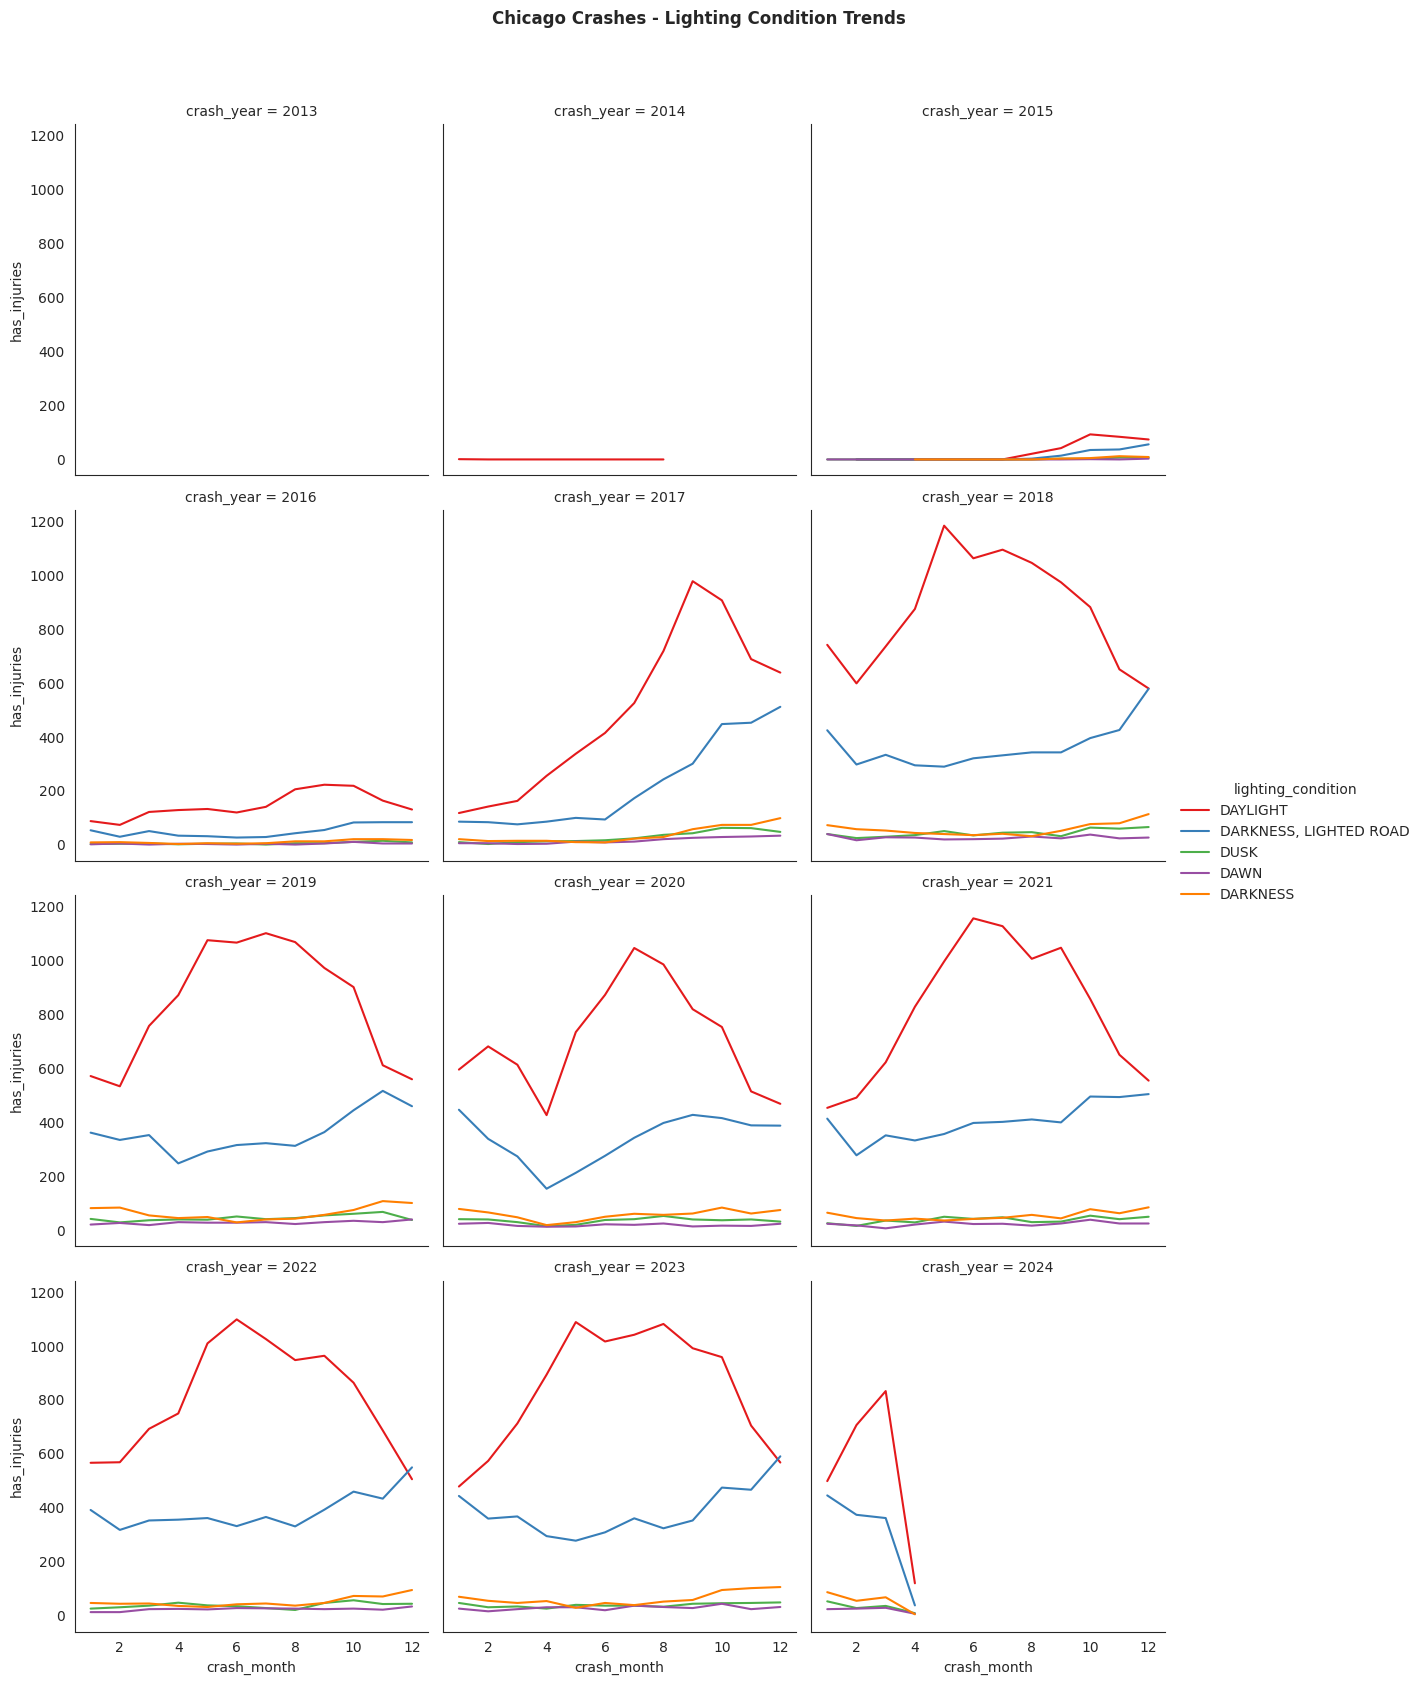

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate crash data by year, month, and lighting condition
injury_data = crash_df.groupby([
    'crash_year',
    'crash_month',
    'lighting_condition'
]).agg({
    'total_injuries': np.sum,  # Sum of injuries
    'fatal_injuries': np.sum   # Sum of fatal injuries
}).fillna(0).reset_index().query('lighting_condition != "UNKNOWN"')  # Exclude unknown lighting conditions

# Initialize a FacetGrid for visualizing the data by year and lighting condition
lighting_grid = sns.FacetGrid(injury_data, col='crash_year', hue='lighting_condition', palette='Set1', col_wrap=3, height=4)
# Map a line plot onto the grid
lighting_grid.map_dataframe(sns.lineplot, 'crash_month', 'total_injuries')
# Add a legend and set the title for the figure
lighting_grid.fig.suptitle('Chicago Crashes - Lighting Condition Trends', y=1.05, fontweight='bold')
lighting_grid.add_legend()
plt.show()


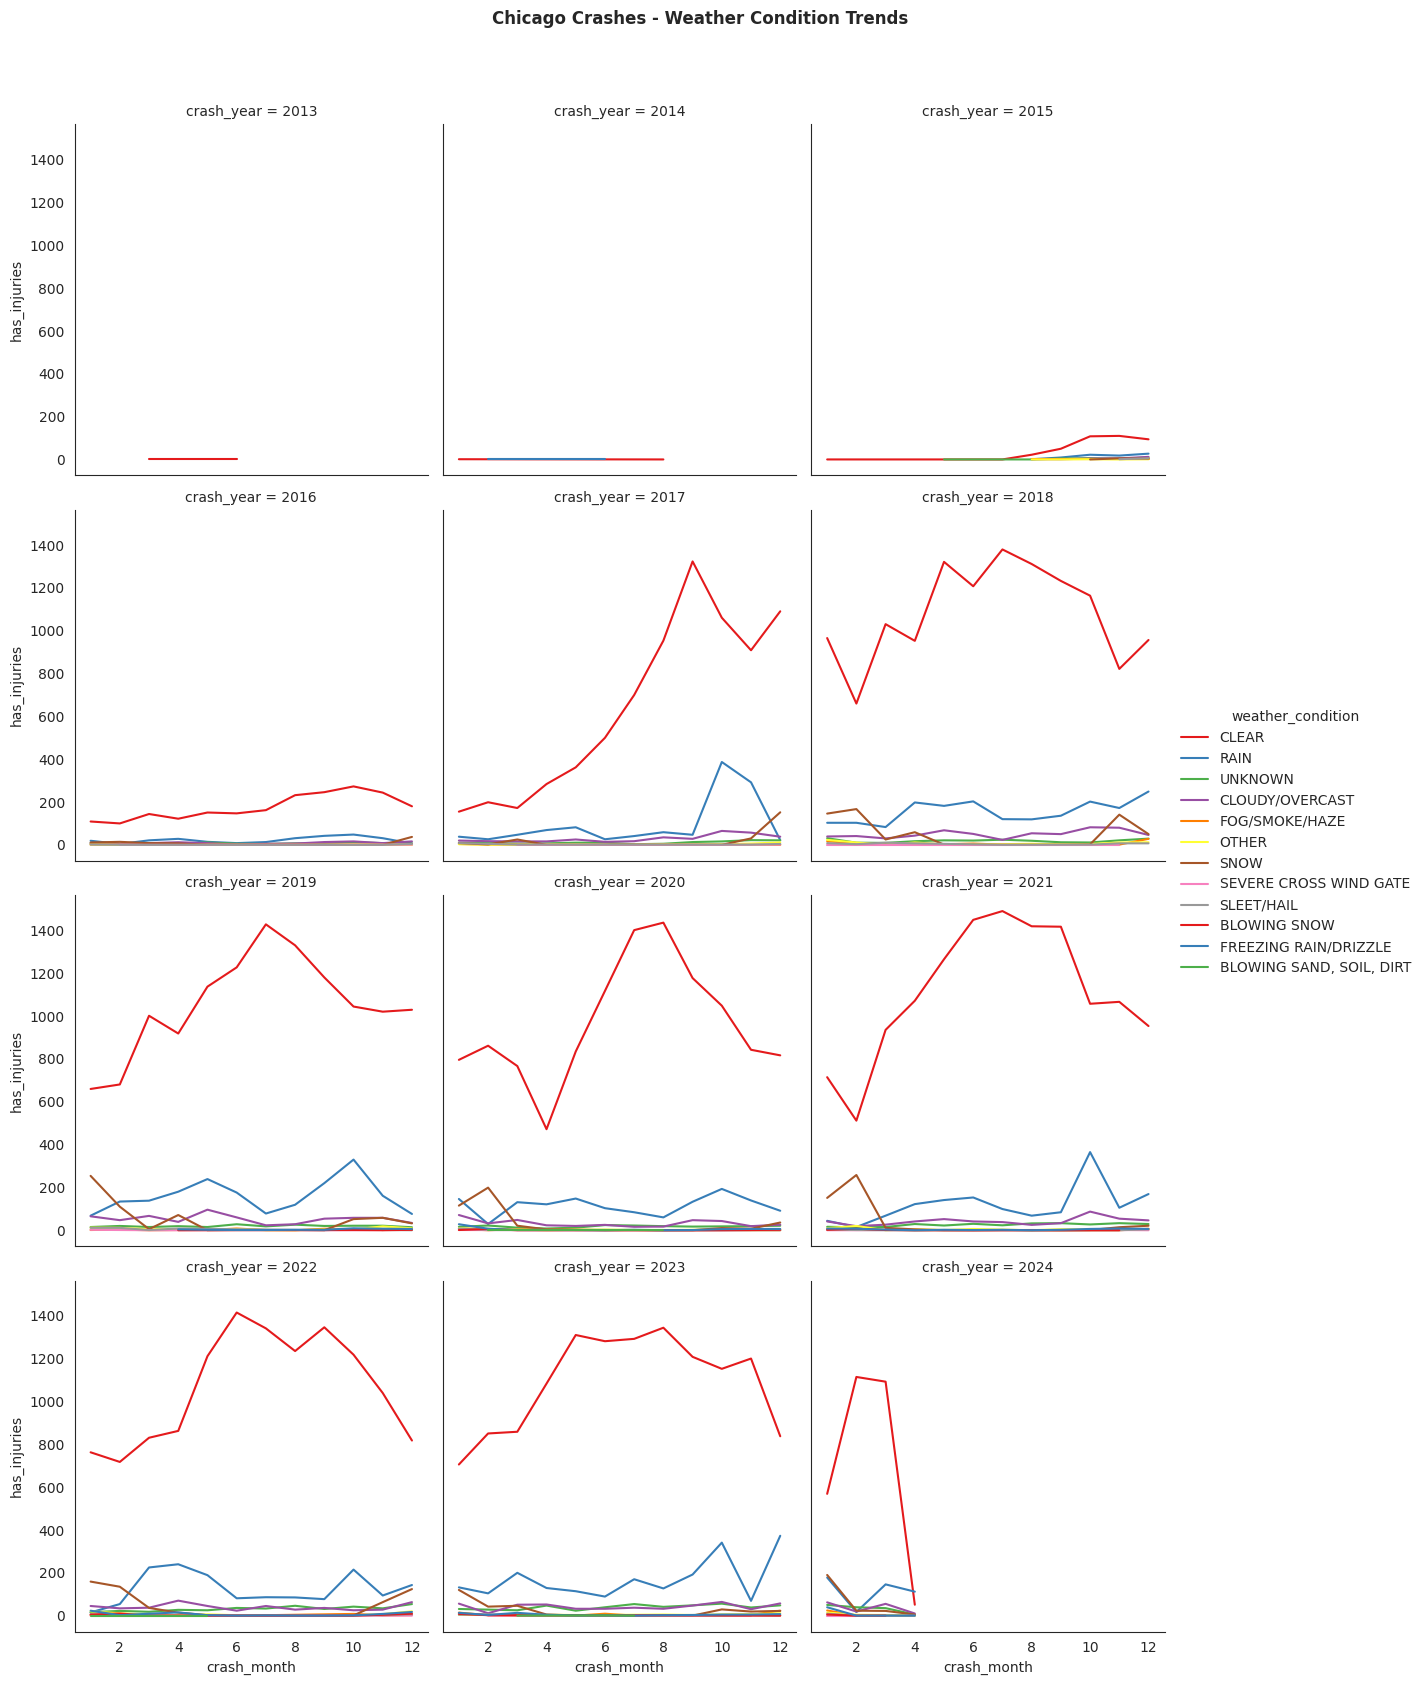

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregating crash data by year, month, and weather condition
weather_injury_data = crash_df.groupby([
    'crash_year',
    'crash_month',
    'weather_condition'
]).agg({
    'total_injuries': np.sum,  # Rename 'has_injuries' to 'total_injuries' for clarity
    'fatal_injuries': np.sum   # Aggregate fatal injuries
}).fillna(0).reset_index()     # Fill missing values with 0

# Set up a FacetGrid to visualize the aggregated data
weather_trends_grid = sns.FacetGrid(weather_injury_data, col='crash_year', hue='weather_condition', palette='Set1', col_wrap=3, height=4)
# Map a line plot onto the grid for 'total_injuries' by 'crash_month'
weather_trends_grid.map_dataframe(sns.lineplot, 'crash_month', 'total_injuries')
# Configure the figure's super title and add a legend
weather_trends_grid.fig.suptitle('Chicago Crashes - Weather Condition Trends', y=1.05, fontweight='bold')
weather_trends_grid.add_legend()
plt.show()


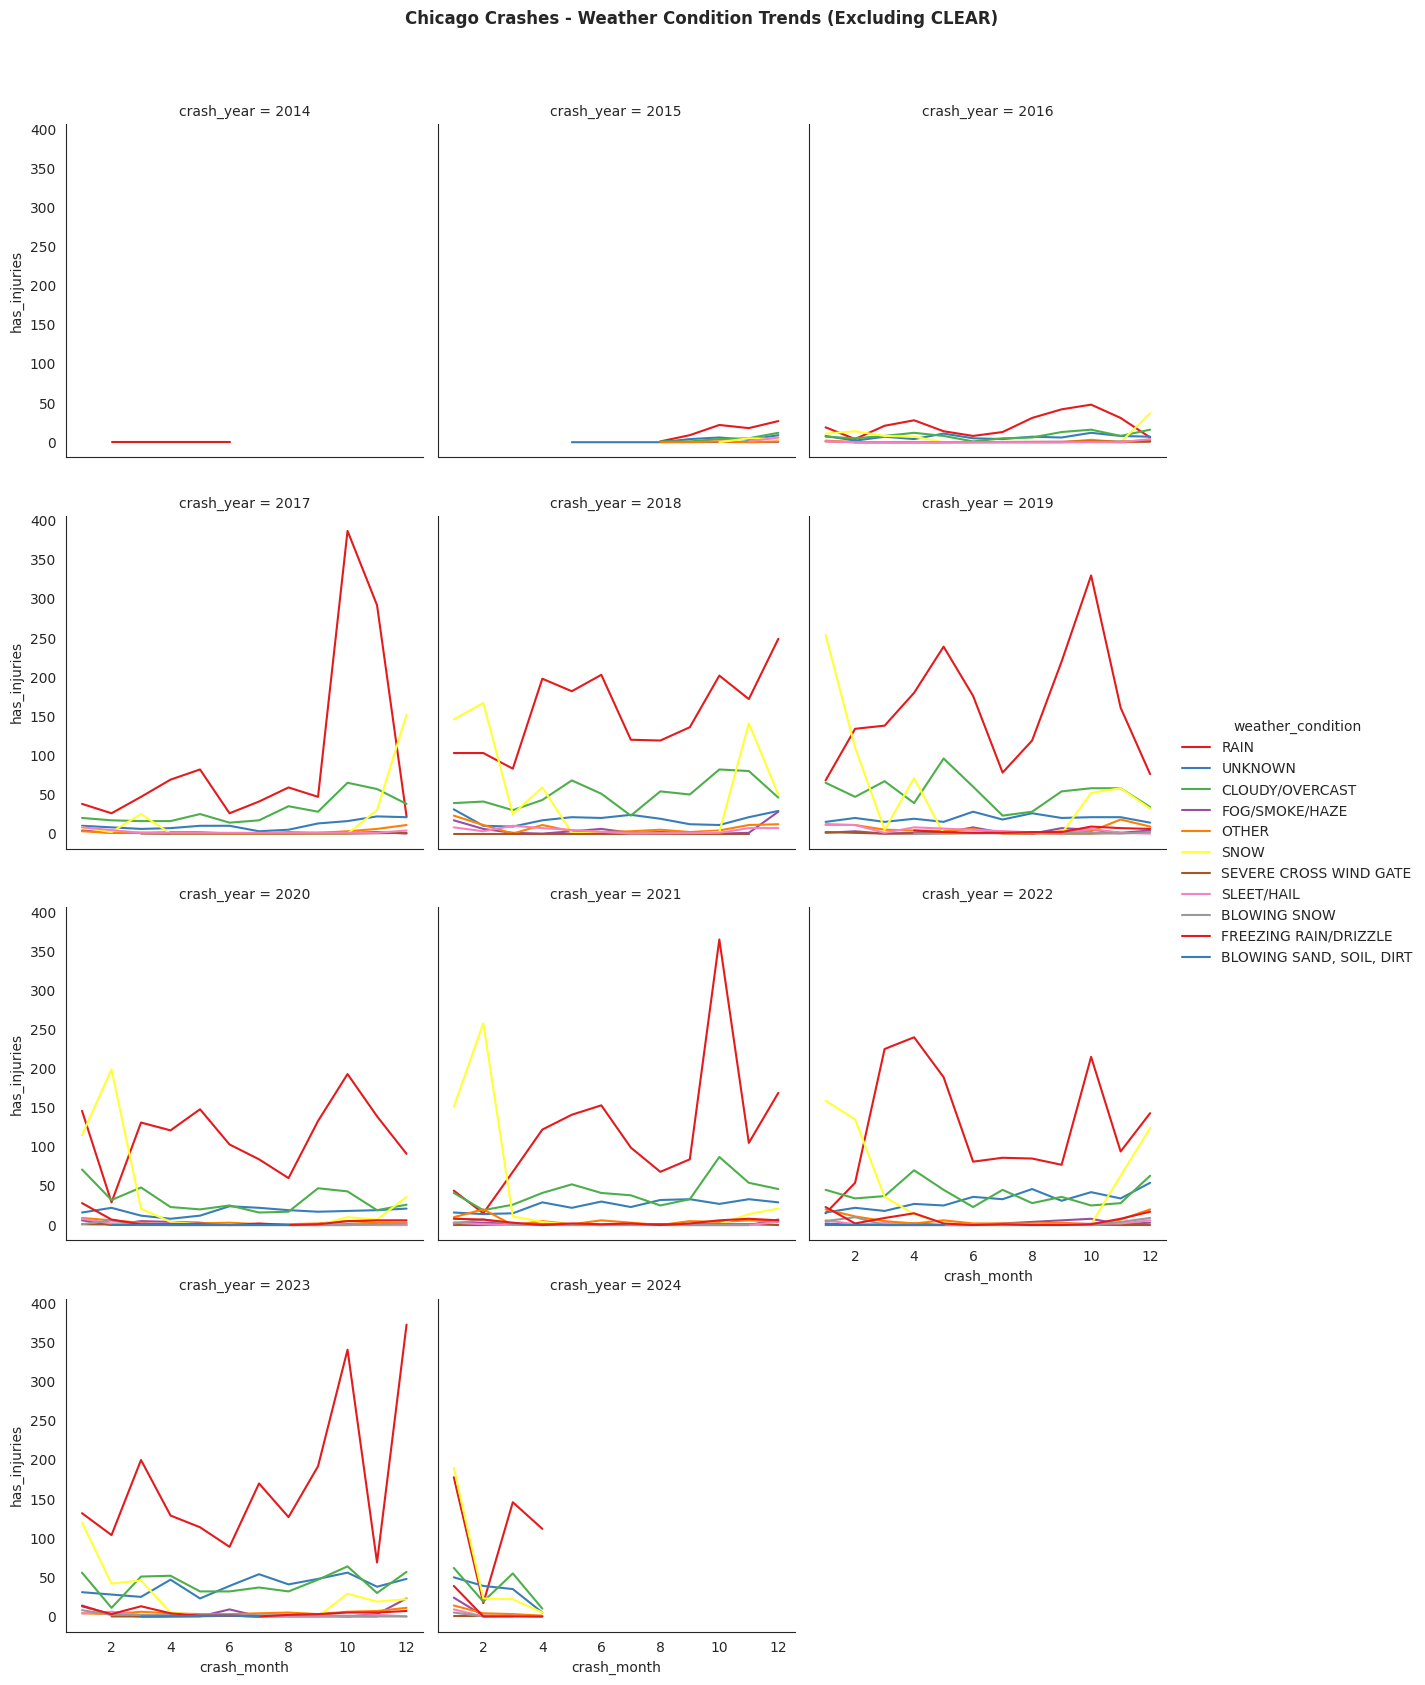

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregating crash data by year, month, and weather condition, excluding 'CLEAR'
filtered_weather_data = crash_df.groupby([
    'crash_year',
    'crash_month',
    'weather_condition'
]).agg({
    'total_injuries': np.sum,  # Sum of non-fatal injuries, renamed for clarity
    'fatal_injuries': np.sum   # Sum of fatal injuries
}).fillna(0).reset_index().query('weather_condition != "CLEAR"')  # Exclude 'CLEAR' weather condition

# Setting up a FacetGrid to visualize the data by year and varying weather conditions
weather_trends_grid = sns.FacetGrid(filtered_weather_data, col='crash_year', hue='weather_condition', palette='Set1', col_wrap=3, height=4)
# Mapping a line plot onto the grid for total injuries by month
weather_trends_grid.map_dataframe(sns.lineplot, 'crash_month', 'total_injuries')
# Adding a legend and configuring the title
weather_trends_grid.fig.suptitle('Chicago Crashes - Weather Condition Trends (Excluding CLEAR)', y=1.05, fontweight='bold')
weather_trends_grid.add_legend()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Copy the DataFrame to avoid altering the original data
scaled_crash_df = crash_df.copy()

# Define the columns to be scaled
columns_to_scale = ['injuries_total', 'injuries_fatal']

# Extract the features for scaling
features_to_scale = scaled_crash_df[columns_to_scale]

# Initialize and fit the scaler
scaler = StandardScaler()
scaler.fit(features_to_scale.values)

# Transform the features and replace in the DataFrame
scaled_crash_df[columns_to_scale] = scaler.transform(features_to_scale.values)

# Display the first 5 rows of the updated DataFrame
print(scaled_crash_df.head(5))


Unnamed: 0           crash_date  crash_year  crash_month  crash_day_of_week  crash_hour crash_time_of_day  \
0           0  2023-07-29 14:45:00        2023            7                  7          14           mid_day   
1           1  2023-08-18 17:58:00        2023            8                  6          17           mid_day   
2           2  2023-07-29 14:30:00        2023            7                  7          14           mid_day   
3           3  2023-07-29 00:50:00        2023            7                  7           0         overnight   
4           4  2023-09-20 12:57:00        2023            9                  4          12           morning   

   latitude  longitude  beat_of_occurrence                  address  street_no street_direction       street_name  \
0     41.85     -87.67                1235       2101 S ASHLAND AVE       2101                S       ASHLAND AVE   
1     41.94     -87.76                1633          3422 N LONG AVE       3422                N          LONG AVE   
2     41.81     -87.59                 222           1320 E 47TH ST       1320                E           47TH ST   
3     41.90     -87.70                1211     999 N CALIFORNIA AVE        999                N    CALIFORNIA AVE   
4     41.74     -87.59                 412  8300 S STONY ISLAND AVE       8300                S  STONY ISLAND AVE   

   posted_speed_limit traffic_control_device      device_condition weather_condition lighting_condition  \
0                  30         TRAFFIC SIGNAL  FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   
1                  30            NO CONTROLS           NO CONTROLS             CLEAR           DAYLIGHT   
2                  10            NO CONTROLS           NO CONTROLS           UNKNOWN            UNKNOWN   
3                  30         TRAFFIC SIGNAL  FUNCTIONING PROPERLY             CLEAR           DARKNESS   
4                  15            NO CONTROLS           NO CONTROLS             CLEAR           DAYLIGHT   

                   trafficway_type           alignment roadway_surface_cond road_defect              first_crash_type  \
0  DIVIDED - W/MEDIAN (NOT RAISED)  STRAIGHT AND LEVEL                  DRY  NO DEFECTS          PARKED MOTOR VEHICLE   
1                      NOT DIVIDED  STRAIGHT AND LEVEL                  DRY  NO DEFECTS                  PEDALCYCLIST   
2                      PARKING LOT  STRAIGHT AND LEVEL              UNKNOWN     UNKNOWN                         ANGLE   
3                      NOT DIVIDED  STRAIGHT AND LEVEL              UNKNOWN     UNKNOWN  SIDESWIPE OPPOSITE DIRECTION   
4                      PARKING LOT  STRAIGHT AND LEVEL                  DRY  NO DEFECTS                  REAR TO SIDE   

                  prim_contributory_cause                             sec_contributory_cause  num_units  has_injuries  \
0  FAILING TO REDUCE SPEED TO AVOID CRASH  OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...          4             0   
1  FAILING TO REDUCE SPEED TO AVOID CRASH                                UNABLE TO DETERMINE          2             1   
2                     UNABLE TO DETERMINE                                     NOT APPLICABLE          2             0   
3                     UNABLE TO DETERMINE                                     NOT APPLICABLE          2             0   
4                        IMPROPER BACKING                                     NOT APPLICABLE          2             0   

   has_fatal                        crash_type         damage  injuries_total  injuries_fatal  
0          0            NO INJURY / DRIVE AWAY    OVER $1,500           -0.34           -0.03  
1          0  INJURY AND / OR TOW DUE TO CRASH  $501 - $1,500            1.43           -0.03  
2          0            NO INJURY / DRIVE AWAY  $501 - $1,500           -0.34           -0.03  
3          0            NO INJURY / DRIVE AWAY    OVER $1,500           -0.34           -0.03  
4          0            NO INJURY / DRIVE AWAY    

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


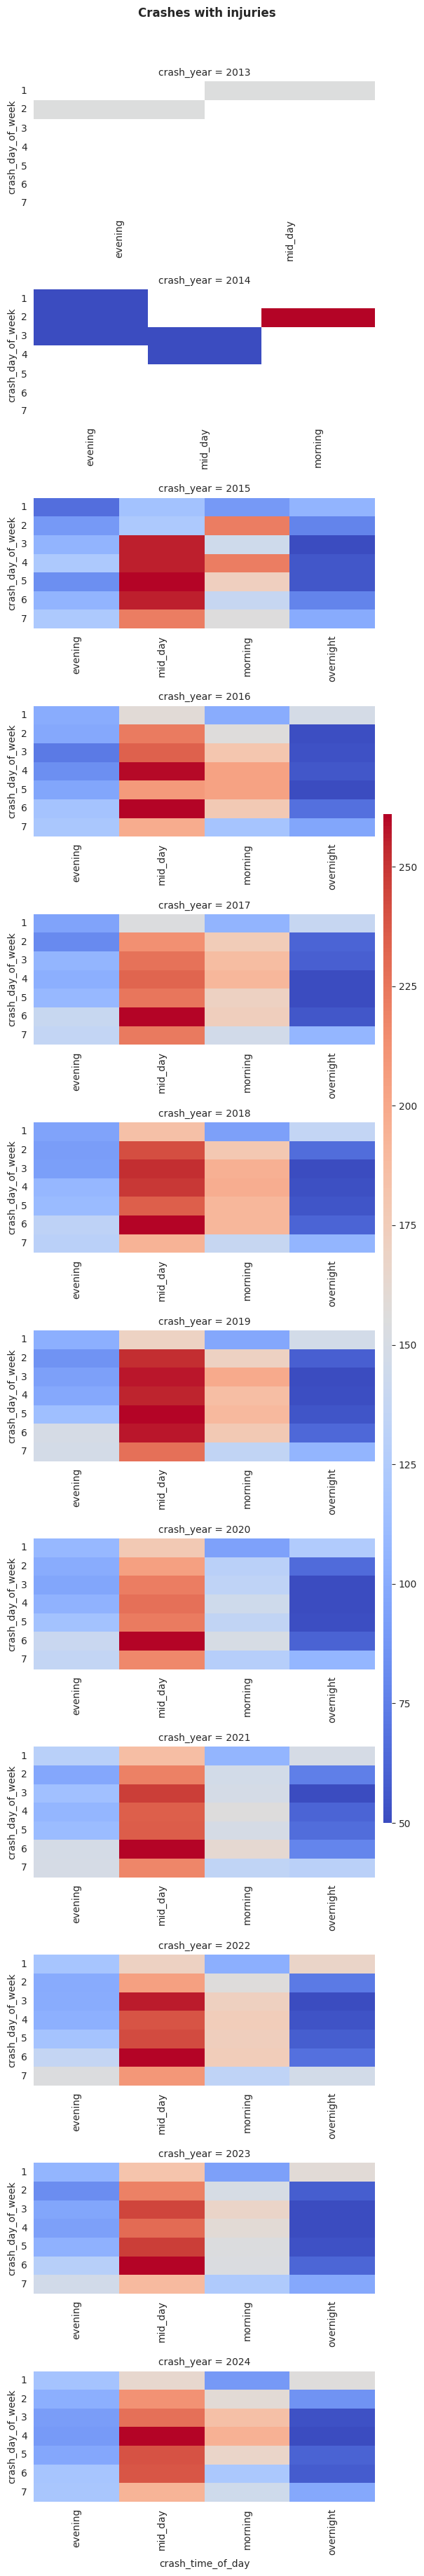

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot_table(index=args[1], columns=args[0], values=args[2], aggfunc='sum')
    ax = sns.heatmap(d, **kwargs, cmap='coolwarm')

    # Setting y-tick and x-tick labels dynamically with correct orientation
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Create a FacetGrid with individual subplots for each 'crash_year'
fg = sns.FacetGrid(crash_df, row='crash_year', aspect=2, sharex=False)
cbar_ax = fg.fig.add_axes([.92, .3, .02, .4])  # Define a colorbar axes

# Map the dataframe to the heatmap function
fg.map_dataframe(draw_heatmap, 'crash_time_of_day', 'crash_day_of_week', 'has_injuries', 
                 cbar_ax=cbar_ax, cmap='coolwarm', square=False)

# Adjust subplot parameters to make room for the colorbar
fg.fig.subplots_adjust(right=.9)
# Set a title for the figure
fg.fig.suptitle('Crashes with Injuries by Time and Day of Week', y=1.02, fontweight='bold')
plt.show()


# Fiddling with Weekends

In [ ]:
print(crash_df['crash_date'])

0         2023-07-29 14:45:00
1         2023-08-18 17:58:00
2         2023-07-29 14:30:00
3         2023-07-29 00:50:00
4         2023-09-20 12:57:00
                 ...         
814104    2020-10-18 00:03:00
814105    2019-10-23 13:32:00
814106    2023-09-13 13:08:00
814107    2019-10-13 01:40:00
814108    2023-05-17 10:20:00
Name: crash_date, Length: 814109, dtype: object


In [ ]:
crash_df['crash_date'] = pd.to_datetime(crash_df['crash_date'])

In [ ]:
print(crash_df['crash_date'].dtypes)

datetime64[ns]


In [ ]:
crash_df.query('crash_day_of_week == 1').crash_date.dt.day_name()[:1]

6    Sunday
Name: crash_date, dtype: object

In [ ]:
crash_df.crash_day_of_week.map(lambda x: 'Weekend' if x in [1,7] else 'Weekday')

0         Weekend
1         Weekday
2         Weekend
3         Weekend
4         Weekday
           ...   
814104    Weekend
814105    Weekday
814106    Weekday
814107    Weekend
814108    Weekday
Name: crash_day_of_week, Length: 814109, dtype: object

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


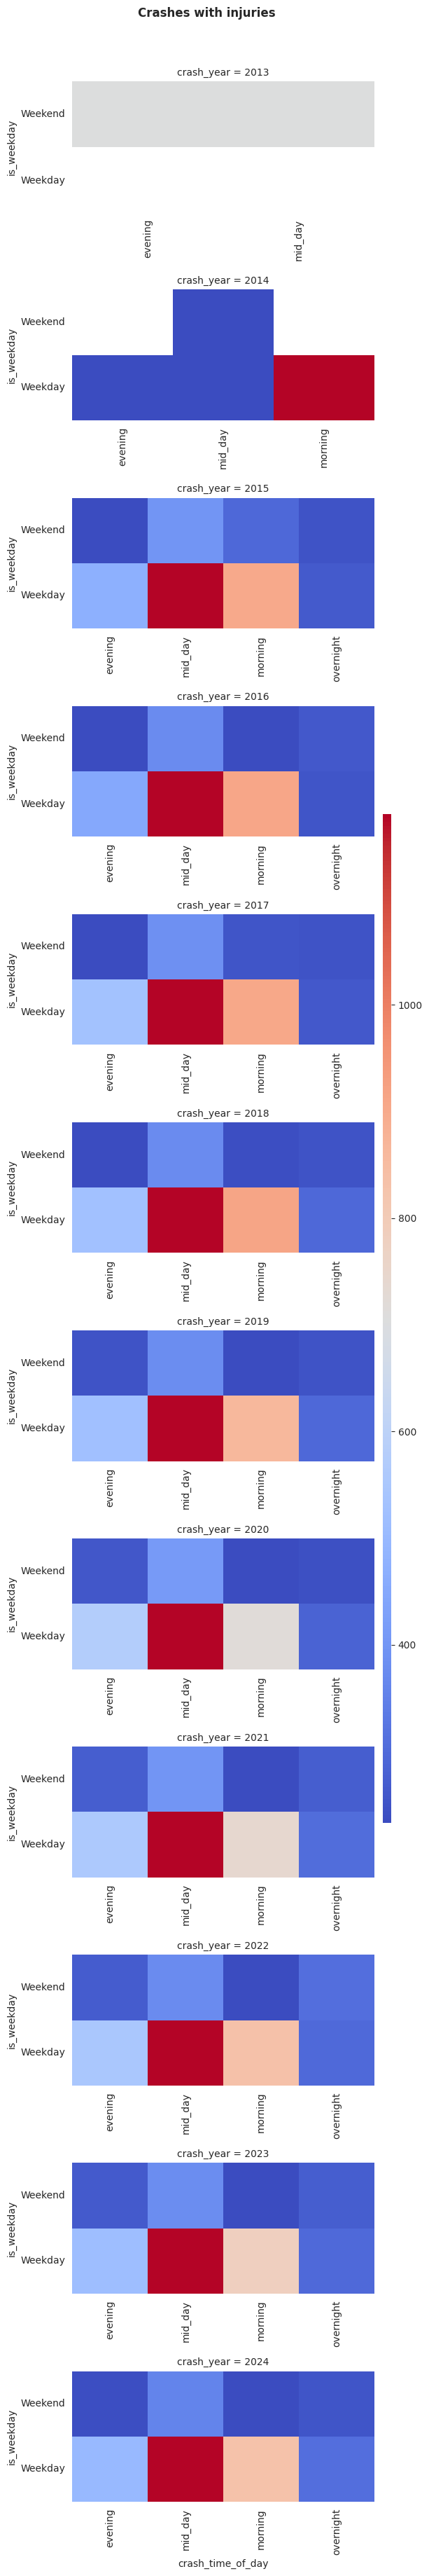

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot_table(index=args[1], columns=args[0], values=args[2], aggfunc='sum')
    ax = sns.heatmap(d, **kwargs, cmap='coolwarm')

    # Dynamic y-tick labels: 'Weekend' if index is 0, 'Weekday' otherwise
    y_labels = ['Weekend' if i == 0 else 'Weekday' for i in d.index]
    ax.set_yticklabels(y_labels, rotation=0)
    x_labels = d.columns.tolist()  # Assuming the columns correctly represent the 'crash_time_of_day'
    ax.set_xticklabels(x_labels, rotation=90)

# Mapping from 'crash_day_of_week' to 'is_weekday'
crash_df['is_weekday'] = crash_df['crash_day_of_week'].apply(lambda x: 0 if x in [1, 7] else 1)

# Create FacetGrid, allowing each plot to have its own axes for better clarity
fg = sns.FacetGrid(crash_df, row='crash_year', aspect=2, sharex=False)
cbar_ax = fg.fig.add_axes([.92, .3, .02, .4])  # Create a specific axis for the colorbar
fg.map_dataframe(draw_heatmap, 'crash_time_of_day', 'is_weekday', 'has_injuries', square=False, cbar_ax=cbar_ax)
fg.fig.subplots_adjust(right=.9)  # Adjust the right margin to accommodate the colorbar
fg.fig.suptitle('Crashes with Injuries by Weekday/Weekend', y=1.02, fontweight='bold')
plt.show()


# Plot Map

In [ ]:
crash_df.groupby(by=['longitude','latitude']).size().reset_index(name='crashes')

longitude  latitude  crashes
0          -87.94     41.96        1
1          -87.94     41.96        1
2          -87.93     41.96        3
3          -87.93     42.01        1
4          -87.93     41.96        1
...           ...       ...      ...
300528     -87.52     41.70        8
300529     -87.52     41.70        1
300530     -87.52     41.70        1
300531     -87.52     41.70        4
300532     -87.52     41.70       13

[300533 rows x 3 columns]

In [ ]:
crash_df_ = crash_df.copy()
crash_df_ = crash_df_.groupby(by=['longitude','latitude','crash_year']).agg(crashes=('has_injuries', 'count'), has_injuries=('has_injuries', 'max'), is_weekday=('is_weekday', 'max')).reset_index().query('crashes > 0')

In [ ]:
crash_df_

longitude  latitude  crash_year  crashes  has_injuries  is_weekday
0          -87.94     41.96        2022        1             0           1
1          -87.94     41.96        2021        1             0           1
2          -87.93     41.96        2020        1             0           1
3          -87.93     41.96        2021        2             0           1
4          -87.93     42.01        2021        1             0           1
...           ...       ...         ...      ...           ...         ...
542123     -87.52     41.70        2020        4             0           1
542124     -87.52     41.70        2021        1             0           1
542125     -87.52     41.70        2022        1             0           1
542126     -87.52     41.70        2023        4             1           1
542127     -87.52     41.70        2024        1             0           1

[542128 rows x 6 columns]

In [ ]:
crash_df_.query('crashes>5')

longitude  latitude  crash_year  crashes  has_injuries  is_weekday
6          -87.93     41.96        2019        8             1           1
7          -87.93     41.96        2020       15             1           1
8          -87.93     41.96        2021       12             1           1
9          -87.93     41.96        2022       14             1           1
41         -87.91     41.95        2019        8             1           1
...           ...       ...         ...      ...           ...         ...
542021     -87.53     41.70        2020        7             0           1
542069     -87.53     41.70        2018        7             0           1
542070     -87.53     41.70        2019        7             0           1
542072     -87.53     41.70        2021        7             1           1
542073     -87.53     41.70        2022        6             0           1

[12739 rows x 6 columns]

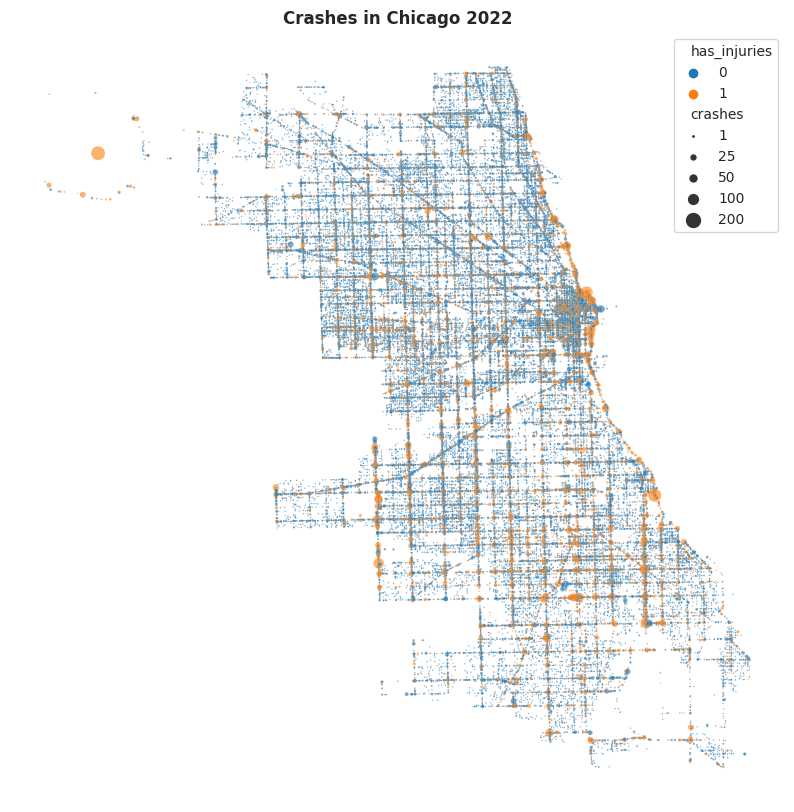

In [ ]:
plt.subplots(figsize=(10,10))
fg = sns.scatterplot(data=crash_df_.query('crash_year == 2022'), x='longitude',y='latitude',
                hue='has_injuries', sizes={1:1,25:12.5,50:25,100:50,200:100}, size_norm=(1,100), size='crashes', alpha=.6)
fg.set_axis_off()
fg.set_title('Crashes in Chicago 2022',fontweight='bold');

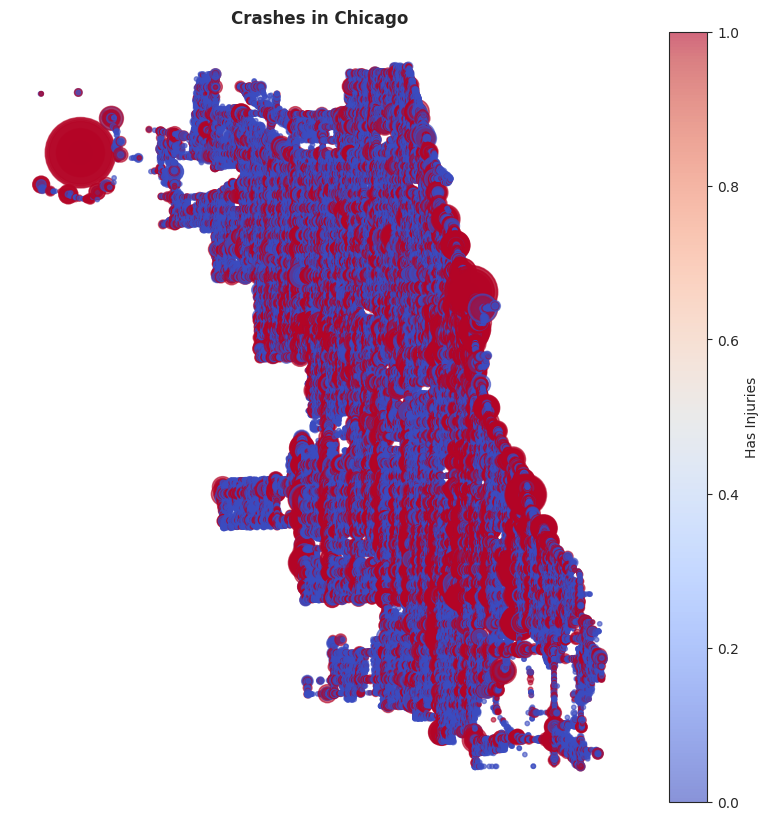

In [ ]:
import matplotlib.pyplot as plt

# Setup the figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Create a scatter plot
scatter = ax.scatter(crash_df_['longitude'], crash_df_['latitude'],
                     c=crash_df_['has_injuries'],  # Color by 'has_injuries'
                     s=crash_df_['crashes'] * 10,  # Scale sizes by 'crashes' with a scaling factor for visibility
                     cmap='coolwarm', alpha=0.6, norm=plt.Normalize(vmin=0, vmax=1))

# Adding a colorbar
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Has Injuries')

# Setting title and removing axes
ax.set_title('Crashes in Chicago', fontweight='bold')
ax.axis('off')

plt.show()


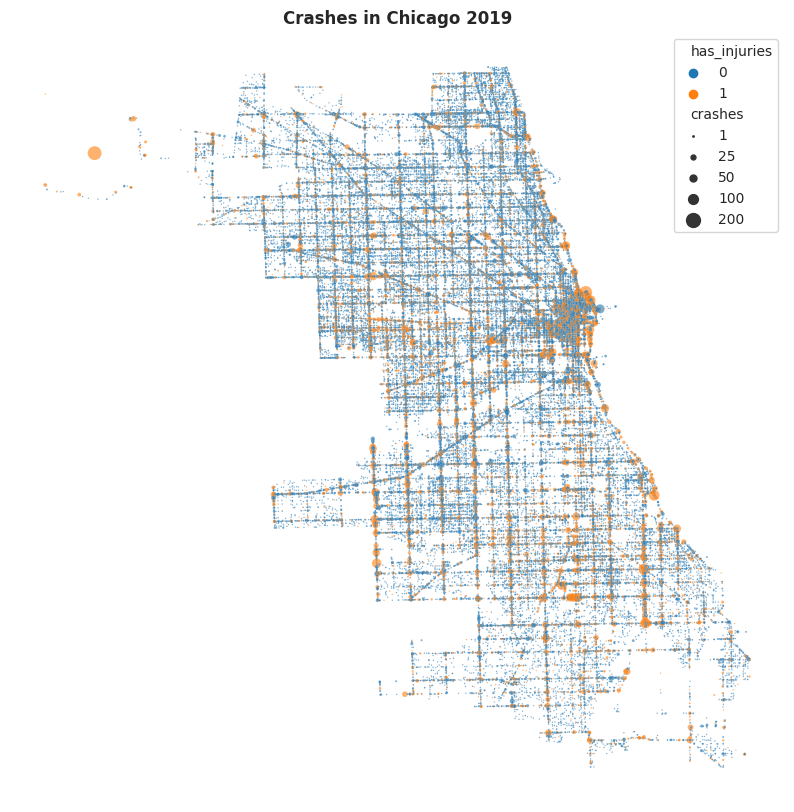

In [ ]:
plt.subplots(figsize=(10,10))
fg = sns.scatterplot(data=crash_df_.query('crash_year == 2019'), x='longitude',y='latitude',
                hue='has_injuries', sizes={1:1,25:12.5,50:25,100:50,200:100}, size_norm=(1,100), size='crashes', alpha=.6)
fg.set_axis_off()
fg.set_title('Crashes in Chicago 2019',fontweight='bold');

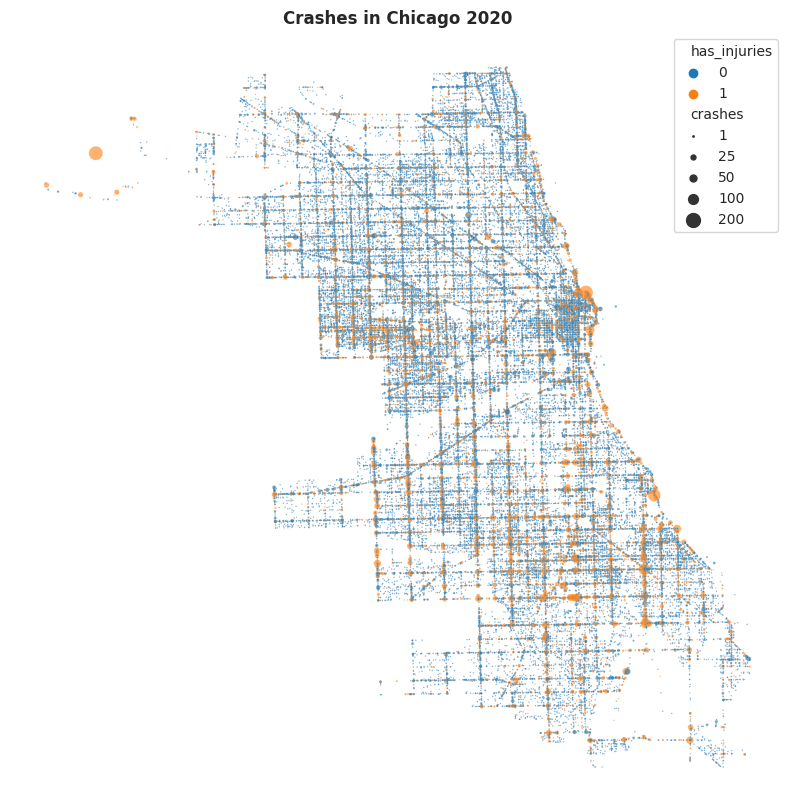

In [ ]:
plt.subplots(figsize=(10,10))
fg = sns.scatterplot(data=crash_df_.query('crash_year == 2020'), x='longitude',y='latitude',
                hue='has_injuries', sizes={1:1,25:12.5,50:25,100:50,200:100}, size_norm=(1,100), size='crashes', alpha=.6)
fg.set_axis_off()
fg.set_title('Crashes in Chicago 2020',fontweight='bold');